<a href="https://colab.research.google.com/github/anonyblank/ml-zoomcamp-hw/blob/main/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [467]:
!wget "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

--2023-10-09 15:00:14--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.16’

data.csv.16         100%[===================>]   1.41M  --.-KB/s    in 0.04s   

2023-10-09 15:00:14 (33.9 MB/s) - ‘data.csv.16’ saved [1475504/1475504]



In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [469]:
selected_columns = [
  "Make",
  "Model",
  "Year",
  "Engine HP",
  "Engine Cylinders",
  "Transmission Type",
  "Vehicle Style",
  "highway MPG",
  "city mpg",
  "MSRP"
]

In [470]:
datasets = pd.read_csv('data.csv')

In [471]:
datasets = datasets[selected_columns]
datasets

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [472]:
datasets.columns = datasets.columns.str.lower().str.replace(" ", "_")

In [473]:
datasets = datasets.fillna(0)

In [474]:
datasets['above_average'] = (datasets.msrp.values >= datasets.msrp.values.mean()).astype(int)

In [475]:
datasets

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [476]:
from sklearn.model_selection import train_test_split

full_train_datasets , test_datasets = train_test_split(datasets, test_size=0.2, random_state=1)
train_datasets , val_datasets = train_test_split(full_train_datasets, test_size=0.25, random_state=1)

In [477]:
full_train_datasets = full_train_datasets.reset_index(drop=True)
train_datasets = train_datasets.reset_index(drop=True)
val_datasets = val_datasets.reset_index(drop=True)
test_datasets = test_datasets.reset_index(drop=True)

In [478]:
numerical = [
  'engine_hp',
  'engine_cylinders',
  'highway_mpg',
  'city_mpg'
]

In [479]:
from sklearn.metrics import roc_auc_score

In [480]:
from sklearn.linear_model import LogisticRegression

In [481]:
auc_scores = {}
for col in numerical:
  model = LogisticRegression()
  model.fit(train_datasets[[col]], train_datasets['above_average'])
  pred_labels = model.predict_proba(val_datasets[[col]])[:, 1]
  auc = roc_auc_score(val_datasets['above_average'], pred_labels)
  if(auc < 0.5):
    auc_scores[col] = -auc
    continue
  auc_scores[col] = auc


In [482]:
# Find the variable with the highest AUC
highest_auc_variable = max(auc_scores, key=auc_scores.get)

print("AUC Scores for Numerical Variables:")
for variable, auc in auc_scores.items():
    print(f"{variable}: {auc:.4f}")

print(f"The numerical variable with the highest AUC is: {highest_auc_variable}")

AUC Scores for Numerical Variables:
engine_hp: 0.9153
engine_cylinders: 0.7691
highway_mpg: 0.6286
city_mpg: 0.6700
The numerical variable with the highest AUC is: engine_hp


In [483]:
from sklearn.feature_extraction import DictVectorizer

In [484]:
categorical = list(train_datasets.dtypes[train_datasets.dtypes == 'object'].index)
categorical

['make', 'model', 'transmission_type', 'vehicle_style']

In [485]:
train_dicts = train_datasets[categorical].to_dict(orient='records')

In [486]:
dv = DictVectorizer(sparse=False)
train_features = dv.fit_transform(train_dicts)
train_labels = train_datasets['above_average']

In [487]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(train_features, train_labels)

LogisticRegression(max_iter=1000, solver='liblinear')

In [488]:
val_dicts = val_datasets[categorical].to_dict(orient='records')
val_features = dv.transform(val_dicts)
val_labels = val_datasets['above_average']

val_pred_labels = model.predict_proba(val_features)[:, 1]

auc = roc_auc_score(val_labels, val_pred_labels)

np.round(auc, 3)

0.972

In [489]:
scores = []
for threshold in np.arange(0.0, 1.0, 0.01):
  actual_positive = val_labels == 1 #1
  actual_negative = val_labels == 0 #0

  pred_positive = val_pred_labels >= threshold #1
  pred_negative = val_pred_labels < threshold #0

  tp = (actual_positive & pred_positive).sum()
  tn = (actual_negative & pred_negative).sum()

  fp = (actual_negative & pred_positive).sum()
  fn = (actual_positive & pred_negative).sum()
  scores.append((threshold, tp, tn, fp, fn))


In [490]:
p_r_datasets = pd.DataFrame(scores, columns=['threshold', 'tp', 'tn', 'fp', 'fn'])
p_r_datasets['precision'] = p_r_datasets.tp / ( p_r_datasets.tp + p_r_datasets.fp )
p_r_datasets['recall'] = p_r_datasets.tp / ( p_r_datasets.tp + p_r_datasets.fn )

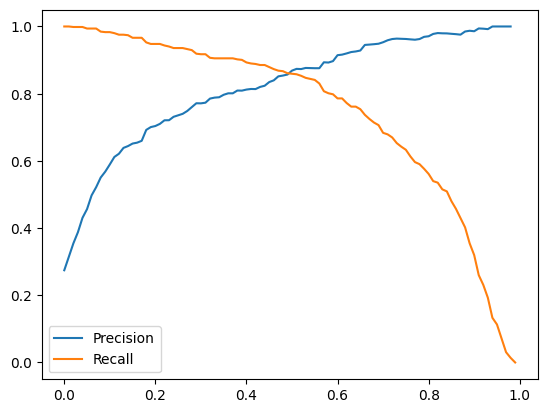

In [491]:
plt.plot(p_r_datasets.threshold, p_r_datasets.precision, label="Precision")
plt.plot(p_r_datasets.threshold, p_r_datasets.recall, label="Recall")
plt.legend()

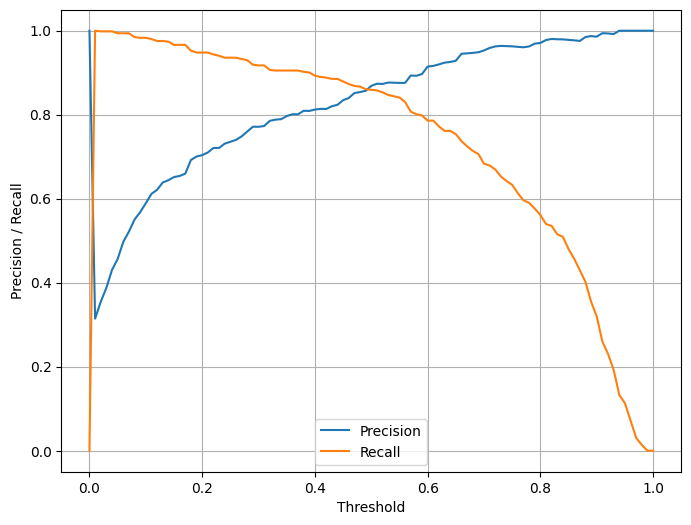

In [492]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Initialize an array of thresholds from 0.0 to 1.0 with a step of 0.01
thresholds = np.arange(0.0, 1.01, 0.01)

# Initialize lists to store precision and recall values
precision_values = []
recall_values = []

# Calculate precision and recall for each threshold
for threshold in thresholds:
    y_pred_thresholded = (val_pred_labels >= threshold).astype(int)
    precision, recall, _ = precision_recall_curve(val_datasets['above_average'], y_pred_thresholded)
    precision_values.append(precision[1])  # Precision at index 1 corresponds to positive class
    recall_values.append(recall[1])  # Recall at index 1 corresponds to positive class

# Plot precision and recall curves
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_values, label='Precision')
plt.plot(thresholds, recall_values, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.legend()
plt.grid(True)
plt.show()


In [493]:
p_r_datasets['F1 Scores'] = (2 * (p_r_datasets.precision * p_r_datasets.precision)) / (p_r_datasets.precision + p_r_datasets.precision)

In [494]:
from sklearn.metrics import f1_score

# Initialize an array of thresholds from 0.0 to 1.0 with a step of 0.01
thresholds = np.arange(0.0, 1.01, 0.01)

# Initialize a list to store F1 scores
f1_scores = []

# Calculate F1 score for each threshold
for threshold in thresholds:
    y_pred_thresholded = (val_pred_labels >= threshold).astype(int)
    f1 = f1_score(val_datasets['above_average'], y_pred_thresholded)
    f1_scores.append(f1)

# Find the threshold at which F1 is maximal
max_f1_threshold = thresholds[np.argmax(f1_scores)]
max_f1_score = max(f1_scores)

print(f"The threshold at which F1 is maximal is: {max_f1_threshold:.2f}")
print(f"The maximal F1 score is: {max_f1_score:.2f}")


The threshold at which F1 is maximal is: 0.51
The maximal F1 score is: 0.87


In [495]:
from sklearn.model_selection import KFold

In [496]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [497]:
from sklearn.metrics import auc
scores = []
for train_index , val_index in kfold.split(full_train_datasets):
  train_data = full_train_datasets.iloc[train_index]
  val_data = full_train_datasets.iloc[val_index]

  train_dicts = train_data[categorical+numerical].to_dict(orient='records')
  val_dicts = val_data[categorical+numerical].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)

  train_x = dv.fit_transform(train_dicts)
  val_x = dv.transform(val_dicts)

  train_y = train_data.above_average.values
  val_y = val_data.above_average.values

  model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
  model.fit(train_x, train_y)

  val_pred_y = model.predict_proba(val_x)[:, 1]

  auc = roc_auc_score(val_y, val_pred_y)

  scores.append(auc)
  # print('auc',)

In [498]:
np.round(np.std(scores), 3)

0.002

In [499]:
from sklearn.model_selection import KFold

# Define the list of C values to iterate over
C_values = [0.01, 0.1, 0.5, 10]

# Initialize a dictionary to store mean and std scores for each C
scores = {}

# Initialize K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Iterate over different C values
for C in C_values:
    # Initialize lists to store AUC scores for each fold
    auc_scores = []

    # Define the model with the current C value
    lr = LogisticRegression(solver='liblinear', C=C, max_iter=1000)

    # Iterate over different folds
    for train_idx, val_idx in kf.split(full_train_datasets):
        train_data_fold = full_train_datasets.iloc[train_idx]
        val_data_fold = full_train_datasets.iloc[val_idx]

        # Apply one-hot-encoding using DictVectorizer
        train_dicts = train_data_fold[categorical].to_dict(orient='records')
        val_dicts = val_data_fold[categorical].to_dict(orient='records')

        dv = DictVectorizer(sparse=False)
        X_train_fold = dv.fit_transform(train_dicts)
        X_val_fold = dv.transform(val_dicts)

        # Train the model
        lr.fit(X_train_fold, train_data_fold['above_average'])

        # Predict probabilities on the validation set
        val_predictions_fold = lr.predict_proba(X_val_fold)[:, 1]

        # Calculate AUC on the validation dataset
        auc_fold = roc_auc_score(val_data_fold['above_average'], val_predictions_fold)

        auc_scores.append(auc_fold)

    # Calculate the mean and standard deviation of AUC scores for the current C
    mean_score = np.mean(auc_scores)
    std_score = np.std(auc_scores)

    # Store the mean and std scores in the dictionary
    scores[C] = (mean_score, std_score)

# Find the C value with the best mean score (ties broken by lowest std)
best_C = min(scores, key=lambda k: (scores[k][0], -scores[k][1]))

best_mean_score, best_std_score = scores[best_C]

print(f"The best C value is: {best_C}")
print(f"The best mean score is: {best_mean_score:.3f}")
print(f"The corresponding std is: {best_std_score:.3f}")


The best C value is: 0.01
The best mean score is: 0.903
The corresponding std is: 0.010
